# Pandas 기술통계

In [4]:
#데이터프레임에 대한 간단한 요약 통계
#numpy의 random 함수로 난수를 생성해보자.
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 5), columns = list('ABCDE'))
df.describe()

,A,B,C,D,E
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.150408,-0.508274,-0.404722,0.356357,0.163100
std,0.582759,1.277264,0.825256,1.649866,1.053281
min,-0.560271,-2.315636,-1.671122,-2.055301,-1.375849
25%,-0.269903,-1.148055,-0.799175,-0.097241,-0.489545
50%,0.154181,-0.302878,-0.010175,0.562808,0.778529
75%,0.570172,0.228644,0.167625,0.882905,0.845366
max,0.857861,0.996554,0.289239,2.488612,1.056998


# Pandas 결측치 처리

In [26]:
#결측치 처리를 위해 결측값이 포함된 데이터프레임을 생성
ex = pd.DataFrame(np.random.randn(6,6), columns = list('ABDCEF'))
ex.loc[2:4, 'A'] = None
ex.loc[3, ['C','E']] = None
ex

,A,B,D,C,E,F
0,1.895736,0.257791,-1.271870,1.684403,-2.503717,0.884549
1,-0.105749,-1.582991,-0.517919,-1.123145,0.701528,0.338033
2,NaN,1.449656,-0.689506,1.919574,0.572479,0.815010
3,NaN,-1.381574,0.978372,NaN,NaN,-0.685000
4,NaN,-0.706719,0.348145,-0.965925,1.937072,-0.127341
5,-0.729664,0.322246,1.189660,-0.605415,0.232101,0.189872


In [29]:
#결측값의 위치 확인 with .isnull() or .notnull()
#.notnull()  결측치가 NULL값이 아니면 True, Null이면 False

ex.notnull() #notnull(ex)도 같은 함수로 같은 결과를 보여줌

,A,B,D,C,E,F
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,False,True,True,True,True,True
3,False,True,True,False,False,True
4,False,True,True,True,True,True
5,True,True,True,True,True,True


In [32]:
pd.isnull(ex)

,A,B,D,C,E,F
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,True,True,False
4,True,False,False,False,False,False
5,False,False,False,False,False,False


In [39]:
#특정 칼럼에 대해서만 결측치의 위치 확인

ex[['A','B']].isnull()

,A,B
0,False,False
1,False,False
2,True,False
3,True,False
4,True,False
5,False,False


In [28]:
#칼럼별 결측치의 개수 구하기
ex.isnull().sum()

A    3
B    0
D    0
C    1
E    1
F    0
dtype: int64

In [40]:
#칼럼별 결측치가 아닌 값의 개수 구하기
ex.notnull().sum()

A    3
B    6
D    6
C    5
E    5
F    6
dtype: int64

In [41]:
#행별 결측치의 개수 구하기
ex.isnull().sum(1)

0    0
1    0
2    1
3    3
4    1
5    0
dtype: int64

In [52]:
#행별 결측치가 아닌 것의 개수 구하기
ex.notnull().sum(1)

0    6
1    6
2    5
3    3
4    5
5    6
dtype: int64

In [48]:
#행별 결측치의 개수를 새로운 칼럼으로 추가하기

ex['sum_NA'] = ex.isnull().sum(1)

,A,B,D,C,E,F,sum_NA
0,1.895736,0.257791,-1.271870,1.684403,-2.503717,0.884549,0
1,-0.105749,-1.582991,-0.517919,-1.123145,0.701528,0.338033,0
2,NaN,1.449656,-0.689506,1.919574,0.572479,0.815010,1
3,NaN,-1.381574,0.978372,NaN,NaN,-0.685000,3
4,NaN,-0.706719,0.348145,-0.965925,1.937072,-0.127341,1
5,-0.729664,0.322246,1.189660,-0.605415,0.232101,0.189872,0


In [67]:
ex = pd.DataFrame(np.random.randn(6,6), columns = list('ABDCEF'))
ex.loc[2:4, 'A'] = None
ex.loc[3, ['C','E']] = None
ex.loc[5, 'C'] = None
ex

,A,B,D,C,E,F
0,-1.229795,0.087217,0.045593,-0.610132,-0.518599,-1.428281
1,1.295465,0.270999,0.611144,-1.464332,0.015151,-0.564462
2,NaN,-0.555706,-0.095843,-0.492483,1.278475,0.125176
3,NaN,-0.876171,1.164588,NaN,NaN,1.550381
4,NaN,1.193974,-0.513824,0.412498,-0.777230,-0.017526
5,-0.090671,-0.855450,-1.124243,NaN,-0.818096,-0.027624


In [53]:
#결측치 대체하기
#결측치를 특정 값으로 대체하기

ex.fillna(0)

,A,B,D,C,E,F
0,1.895736,0.257791,-1.271870,1.684403,-2.503717,0.884549
1,-0.105749,-1.582991,-0.517919,-1.123145,0.701528,0.338033
2,0.000000,1.449656,-0.689506,1.919574,0.572479,0.815010
3,0.000000,-1.381574,0.978372,0.000000,0.000000,-0.685000
4,0.000000,-0.706719,0.348145,-0.965925,1.937072,-0.127341
5,-0.729664,0.322246,1.189660,-0.605415,0.232101,0.189872


In [58]:
#결측치를 바로 앞과 같은 값으로 대체하기
ex.fillna(method = 'ffill')

,A,B,D,C,E,F
0,-1.447923,0.780325,-1.023647,0.891681,-0.190046,1.416857
1,1.585117,-0.231241,-0.424712,-1.446260,0.025731,-0.097474
2,1.585117,0.094747,0.403061,-0.881867,-0.413882,1.864521
3,1.585117,0.210748,0.573395,-0.881867,-0.413882,-0.752348
4,1.585117,-0.515033,0.271111,-0.680084,1.647435,0.156213
5,1.185709,0.270345,-0.983475,-0.680084,-1.262309,-1.506605


In [56]:
ex.fillna(method = 'pad')

,A,B,D,C,E,F
0,0.839046,1.885383,1.227344,-0.047884,-0.281789,-2.099639
1,0.952627,-1.121190,1.018172,0.045608,1.602011,-0.630627
2,0.952627,-0.073488,1.697628,0.721322,-0.351972,0.841598
3,0.952627,0.821687,1.643538,0.721322,-0.351972,1.542239
4,0.952627,1.418852,0.015414,-2.315059,-0.901417,-0.516885
5,-0.481508,-0.670862,-0.357352,-0.299421,0.100098,0.008314


In [59]:
#결측치를 바로 뒤와 같은 값으로 대체하기
ex.fillna(method = 'bfill')

,A,B,D,C,E,F
0,-1.447923,0.780325,-1.023647,0.891681,-0.190046,1.416857
1,1.585117,-0.231241,-0.424712,-1.446260,0.025731,-0.097474
2,1.185709,0.094747,0.403061,-0.881867,-0.413882,1.864521
3,1.185709,0.210748,0.573395,-0.680084,1.647435,-0.752348
4,1.185709,-0.515033,0.271111,-0.680084,1.647435,0.156213
5,1.185709,0.270345,-0.983475,NaN,-1.262309,-1.506605


In [60]:
ex.fillna(method = 'backfill')

,A,B,D,C,E,F
0,-1.447923,0.780325,-1.023647,0.891681,-0.190046,1.416857
1,1.585117,-0.231241,-0.424712,-1.446260,0.025731,-0.097474
2,1.185709,0.094747,0.403061,-0.881867,-0.413882,1.864521
3,1.185709,0.210748,0.573395,-0.680084,1.647435,-0.752348
4,1.185709,-0.515033,0.271111,-0.680084,1.647435,0.156213
5,1.185709,0.270345,-0.983475,NaN,-1.262309,-1.506605


In [61]:
#결측치를 해당 칼럼의 평균치로 대체하기

ex.fillna(ex.mean())

,A,B,D,C,E,F
0,-1.447923,0.780325,-1.023647,0.891681,-0.190046,1.416857
1,1.585117,-0.231241,-0.424712,-1.446260,0.025731,-0.097474
2,0.440968,0.094747,0.403061,-0.881867,-0.413882,1.864521
3,0.440968,0.210748,0.573395,-0.529133,-0.038614,-0.752348
4,0.440968,-0.515033,0.271111,-0.680084,1.647435,0.156213
5,1.185709,0.270345,-0.983475,-0.529133,-1.262309,-1.506605


In [63]:
#결측치를 다른 칼럼의 값으로 대체하기
#np.where(조건1, 행동1, 행동2)로 조건1이 맞으면 행동1을, 조건1이 틀리면 행동2를 하라는 함수
#np.where() 함수를 활용해 A열의 결측치를 B열 같은 행의 값으로 대체해보자.

ex['A'] = np.where(pd.notnull(ex['A']) == True, ex['A'], ex['B'])
ex

,A,B,D,C,E,F
0,-1.447923,0.780325,-1.023647,0.891681,-0.190046,1.416857
1,1.585117,-0.231241,-0.424712,-1.446260,0.025731,-0.097474
2,0.094747,0.094747,0.403061,-0.881867,-0.413882,1.864521
3,0.210748,0.210748,0.573395,NaN,NaN,-0.752348
4,-0.515033,-0.515033,0.271111,-0.680084,1.647435,0.156213
5,1.185709,0.270345,-0.983475,NaN,-1.262309,-1.506605


In [66]:
#결측치 제거하기
#결측치가 있는 행만 제거하기

ex.dropna(axis = 0)

,A,B,D,C,E,F
0,0.506791,0.022645,-1.453959,-0.492916,-1.023646,-1.569835
1,-0.494152,1.407351,1.120763,-0.258360,-1.131211,0.711770


In [68]:
#결측치가 있는 칼럼 제거하기

ex.dropna(axis = 1)

,B,D,F
0,0.087217,0.045593,-1.428281
1,0.270999,0.611144,-0.564462
2,-0.555706,-0.095843,0.125176
3,-0.876171,1.164588,1.550381
4,1.193974,-0.513824,-0.017526
5,-0.855450,-1.124243,-0.027624


In [1]:
#결측치 보간하기(interpolation)
#numpy, pandas 패키지랑 matplotlib, scipy, math, warnings 패키지 모두 import 할 것

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

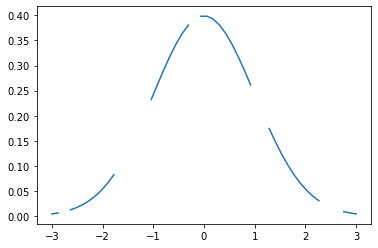

In [3]:
#평균 = 0, 분산 = 1 인 정규분포 생성
mu = 0
var = 1

#sigma (표준편차 계산)
sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma) #평균 0을 기준으로 +-3시그마 만큼을 x의 범위로 설정

#랜덤한 10개의 데이터를 삭제하고 10개 구간 만듦
idx = np.random.choice(len(x), size = 10)
x[idx] = np.nan #nan으로 데이터 none화

#정규분포 시각화
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [4]:
#결측 개수 확인
#먼저 x를 Series화하면서 결측치 개수 계산
pd.Series(x).isnull().sum()

10

In [5]:
#Series화된 x에서 NaN 위치 확인

pd.Series(x).head(20)

0    -3.000000
1    -2.877551
2          NaN
3    -2.632653
4    -2.510204
5    -2.387755
6    -2.265306
7    -2.142857
8    -2.020408
9    -1.897959
10   -1.775510
11         NaN
12         NaN
13   -1.408163
14         NaN
15         NaN
16   -1.040816
17   -0.918367
18   -0.795918
19   -0.673469
dtype: float64

In [6]:
#보간을 통해 채워넣기

x_inter = pd.Series(x).interpolate()
x_inter.head(20)

0    -3.000000
1    -2.877551
2    -2.755102
3    -2.632653
4    -2.510204
5    -2.387755
6    -2.265306
7    -2.142857
8    -2.020408
9    -1.897959
10   -1.775510
11   -1.653061
12   -1.530612
13   -1.408163
14   -1.285714
15   -1.163265
16   -1.040816
17   -0.918367
18   -0.795918
19   -0.673469
dtype: float64

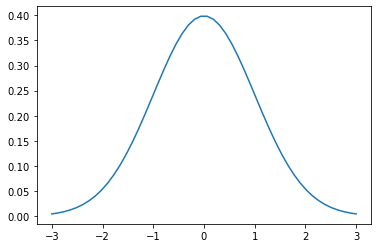

In [7]:
#보간 이후 채워진 값 시각화
plt.plot(x_inter, stats.norm.pdf(x_inter, mu, sigma))
plt.show()